In [1]:
# Alan Tabanlı algoritma
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap=None):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)

In [3]:
para = cv2.imread(r"opencv_2\media\coin4.jpg")

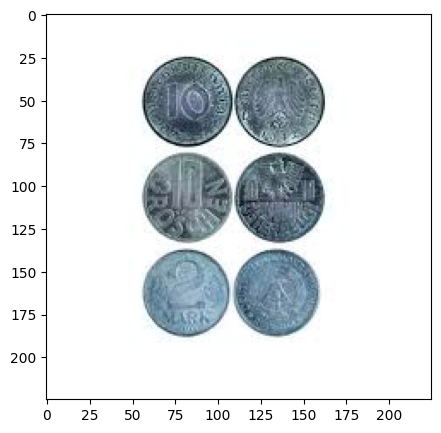

In [4]:
display(para)

In [5]:
gray = cv2.cvtColor(para, cv2.COLOR_BGR2GRAY)

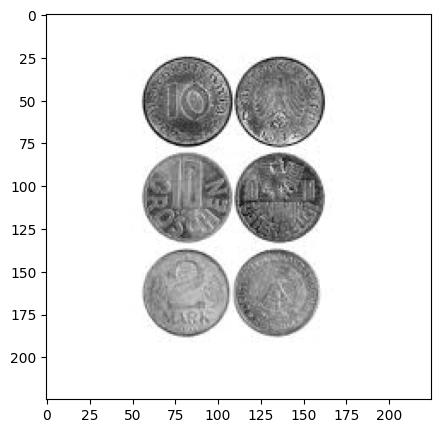

In [6]:
display(gray, 'gray')

In [7]:
blur = cv2.medianBlur(gray, 25)

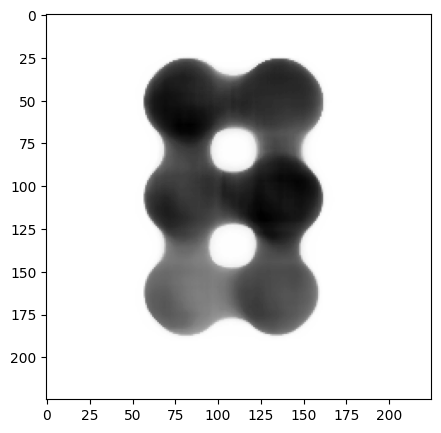

In [8]:
display(blur, 'gray')

In [9]:
ret, thresh = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY)
thresh = cv2.bitwise_not(thresh)

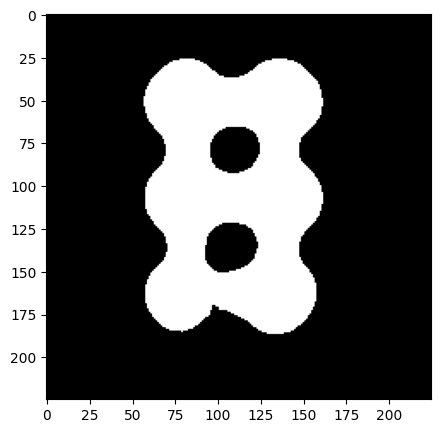

In [10]:
display(thresh, 'gray')

In [11]:
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
hierarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [-1,  1, -1,  0]]], dtype=int32)

In [12]:
for c in range(len(contours)):
    if hierarchy[0][c][3] == -1:
        cv2.drawContours(para, contours, c, (0,0,255), 5)

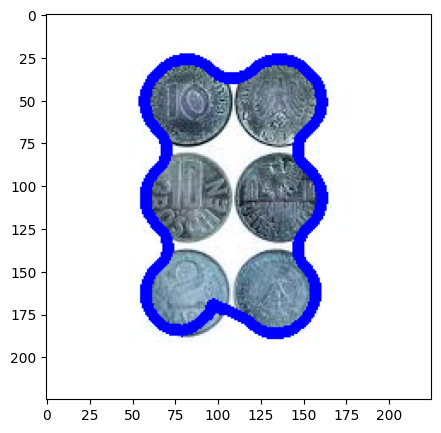

In [13]:
display(para)

In [14]:
img = cv2.imread(r"opencv_2\media\coin4.jpg")

In [15]:
img = cv2.medianBlur(img, 9)

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [17]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

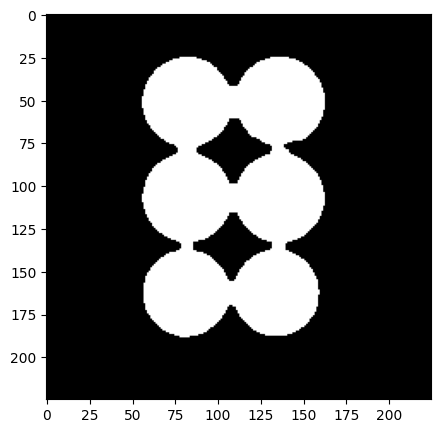

In [18]:
display(thresh, 'gray')

In [19]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

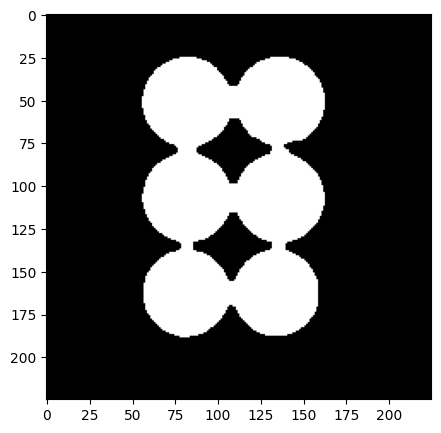

In [20]:
display(opening, 'gray')

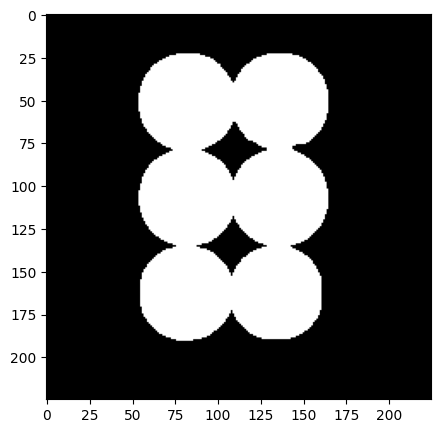

In [21]:
sure_bg = cv2.dilate(opening, kernel, iterations=2)
display(sure_bg, 'gray')

In [28]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret , sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
# sure_fg = cv2.bitwise_not(sure_fg)

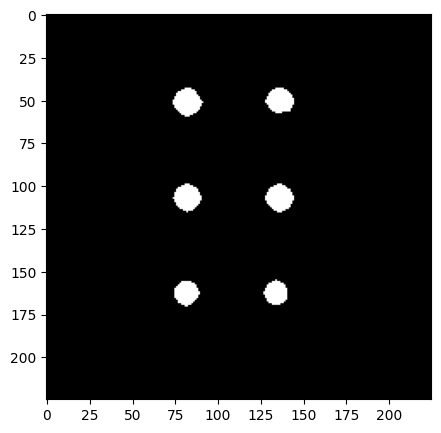

In [29]:
display(sure_fg, 'gray')

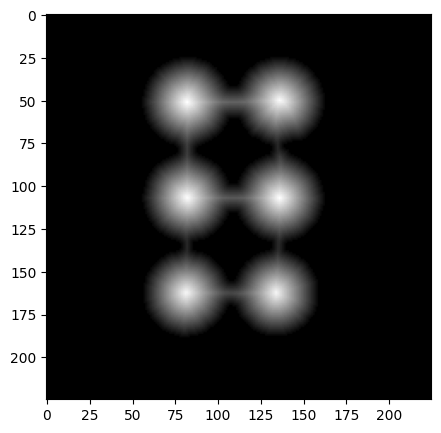

In [30]:
display(dist_transform, 'gray')

In [31]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

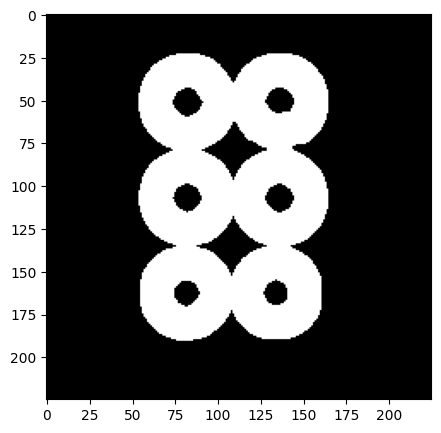

In [32]:
display(unknown, 'gray')

In [33]:
ret , markers = cv2.connectedComponents(sure_fg)

markers = markers + 1
markers[unknown == 255] = 0

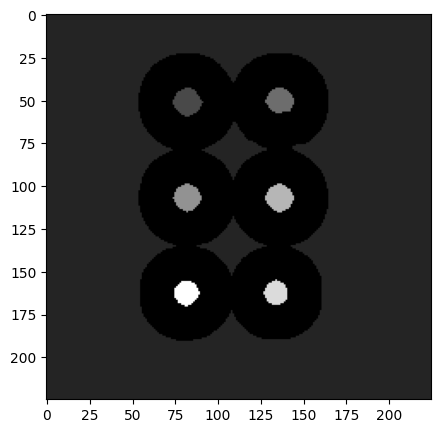

In [34]:
display(markers, 'gray')

In [35]:
markers = cv2.watershed(img, markers)

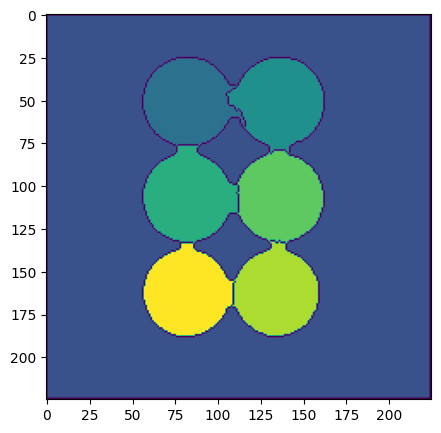

In [36]:
display(markers)

In [45]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours, i, (255,0,0), 1)

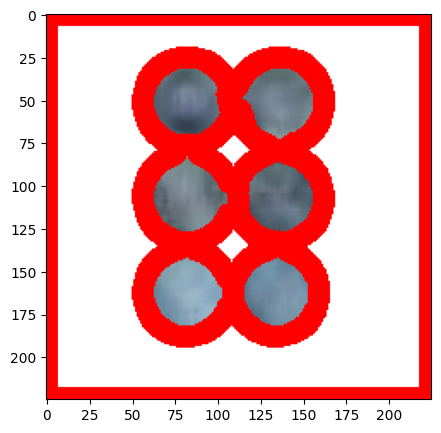

In [47]:
display(img)